In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import plotly as px

# Import DataFrame

In [3]:
www = pd.read_csv('data/assessment_ds.csv', encoding='latin1')
www.head()

,Date,Page Title,Age,Gender,Source / Medium,Pageviews,Unique Pageviews
0,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,35-44,female,m.facebook.com / referral,35541,31670
1,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,29730,26236
2,20190608,Chrissy Teigen Wore the Pleated-Jean Trend | W...,35-44,female,m.facebook.com / referral,21249,18923
3,20190606,Chrissy Teigen Wore the Pleated-Jean Trend | W...,45-54,female,m.facebook.com / referral,18858,16825
4,20190608,Chrissy Teigen Wore the Pleated-Jean Trend | W...,25-34,female,m.facebook.com / referral,18157,15970


# Feature Engineering

In [4]:
#change date format
www['Date']= pd.to_datetime(www['Date'], format="%Y%m%d")

In [5]:
#split 'Page Title' column into two
page_split = www['Page Title'].str.split('|', expand = True)
www['Page'] = page_split[0]
www['Title'] = page_split[1]
for i in range(len(www['Title'])):
    if "Who What Wear UK" in www['Title'][i]:
        www['Title'][i] = 'Who What Wear UK'
    elif "Who What Wear" in www['Title'][i]:
        www['Title'][i] = 'Who What Wear'
    else:
        pass

C:\Users\Brianna Lytle\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Brianna Lytle\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
#split 'Source / Medium column into two'
source_split = www['Source / Medium'].str.split('/', expand = True)
www['Source'] = source_split[0]
www['Medium'] = source_split[1]
# unique page view average
www['unique_percent'] = www['Unique Pageviews'] / www['Pageviews']
#Word Count fcor Page - not including title
www['page_wc'] = www['Page'].apply(lambda x: len(x.split()))
#binary values - if article is from specific major source
www['source_facebook'] = np.where(www['Source'].str.contains('facebook'), 1,0)
www['source_google'] = np.where(www['Source'].str.contains('google'), 1, 0)
www['source_yahoo'] = np.where(www['Source'].str.contains('yahoo'), 1, 0)
www['source_instagram'] = np.where(www['Source'].str.contains('instagram'), 1, 0)
www['source_pinterest'] = np.where(www['Source'].str.contains('pinterest'), 1, 0)

In [7]:
# How many page titles have a numerical value in it
numbers = ['1', '2', '3', '4', '5','6','7','8','9','0']
def number_search(column):
    for i in numbers:
        if i in column:
            return 1
        else:
            return 0
www['page_number'] = www['Page'].apply(number_search)

In [8]:
#another column identifying if article is from major source
def get_source(data):
    data = data.lower()
    sources = { 'facebook': 'Facebook',
                'google': 'Google',
                'yahoo': 'Yahoo',
                'instagram': 'Instagram',
                'pinterest': 'Pinterest',
                'other': 'Other'}

    for key, value in sources.items():
        if data.find(key) != -1: # If key name is found in row data
            return value
        
        
www['major_sources'] = www['Source'].apply(get_source)

In [9]:
www['major_sources'].fillna('other', inplace = True)

**Save Feature Engineered Dataframe**

In [10]:
www.to_csv('data/www_fe.csv', index = False)

# Who is our Audience? What Demographic represents our core audience?

**Main Demographics:**
- There is about a 9 to 1 ratio split between the female and male audience. Based on this dataset, about 89.5% of the audience is female and 10.5% of the audience is male. 
- The most popular age group among the genders is between the age 25-34 (31%) and 35-44 (21%). Surprisingly, audience members between the age 18-21 only take up about 5% of the dataset
- The most popular Title reference of articles viewed across all demographics is from the original 'Who What Wear'.
- The second most popular Title reference among all demographics is "The Latest Fitness, Health and Wellness Tips."
- The least popular Title reference among all demographics is "The Thirty." However, this title reference is primarily read by people in the 25-34 age group

In [11]:
www['Age'].value_counts(normalize = True)

25-34    0.310182
35-44    0.210472
45-54    0.181530
55-64    0.160800
65+      0.083896
18-24    0.053122
Name: Age, dtype: float64

In [12]:
www['Gender'].value_counts(normalize = True)

female    0.894825
male      0.105175
Name: Gender, dtype: float64

Text(0.5, 1.0, 'WWW June 2019 Audience Demographic')

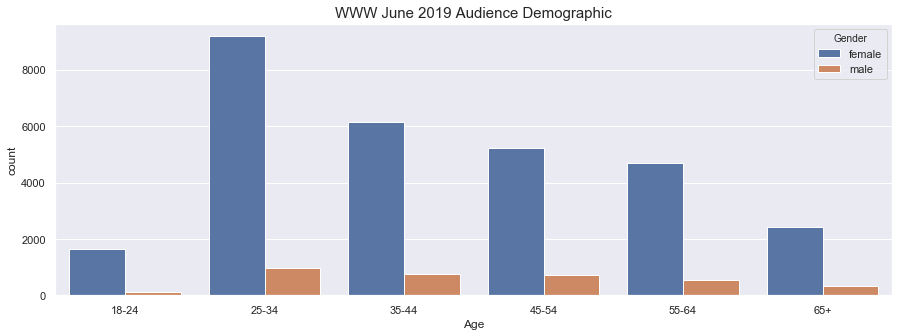

In [56]:
plt.figure(figsize = (15,5))
sns.set()
sns.countplot(x = 'Age', hue = 'Gender', data = www, 
              order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']).set_title('WWW June 2019 Audience Demographic', fontsize = 15)

Text(0.5, 1.0, 'June 2019 - Most Popular Article Titles by Age Group')

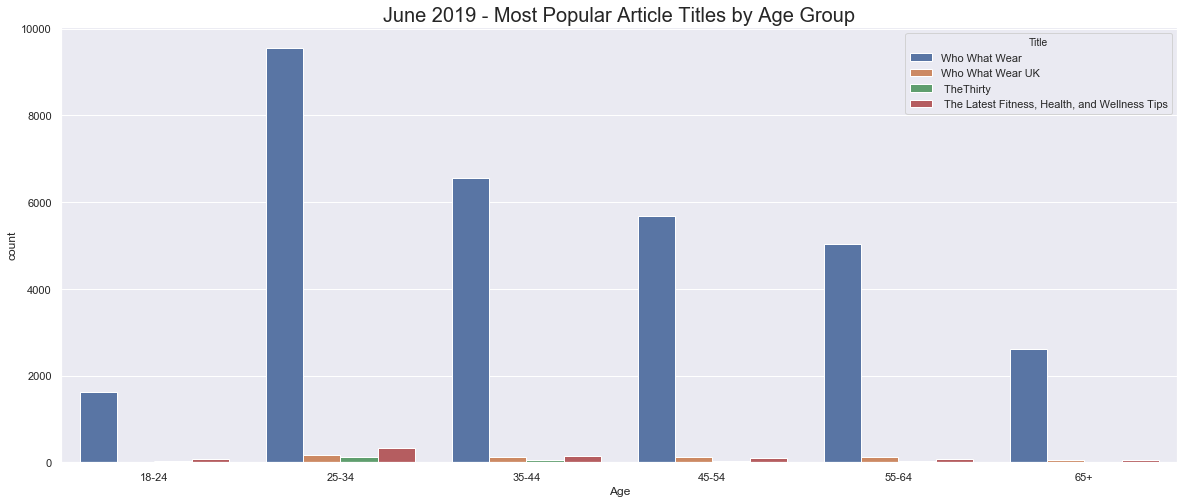

In [55]:
plt.figure(figsize = (20, 8))
sns.set()
sns.countplot(x = 'Age', hue = 'Title', data = www, 
              order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']).set_title('June 2019 - Most Popular Article Titles by Age Group', fontsize = 20)

 # Other Findings:

Notes: 
- If Medium is 'organic', then the source is from Google. 
- If Medium is 'email', then it is from the newsletter - this means that the user is already subscribed to the emails. 
- If Medium is 'cpc' or 'paid', then the source is from Facebook
- If Medium is '(none)', then the article source is from (direct)
- If Medium is 'earned-share', then the article source is from share-button
- If Medium is from 'facebook', then the article source is from another online magazine (ex/popsugar, lauren conrad)
- If Medium is from  'display', then the article source if from a WWW site

In [17]:
# www[['Pageviews', 'Unique Pageviews']].describe()
www.groupby(['Age']).mean()

,Date,Pageviews,Unique Pageviews,unique_percent,page_wc,source_facebook,source_google,source_yahoo,source_instagram,source_pinterest
Age,,,,,,,,,,
18-24,2.019062e+07,263.436207,213.547701,0.815240,7.978736,0.295402,0.527586,0.014368,0.004023,0.017241
25-34,2.019062e+07,434.298819,356.000394,0.816392,8.430807,0.278543,0.428839,0.011516,0.009941,0.038091
35-44,2.019062e+07,408.506672,342.414128,0.840094,8.482158,0.377140,0.287061,0.032057,0.006527,0.028576
45-54,2.019062e+07,365.689876,304.011268,0.841527,8.463337,0.354356,0.247898,0.038850,0.002523,0.039859
55-64,2.019062e+07,375.194228,309.094171,0.833824,8.460794,0.279286,0.256313,0.046326,0.001519,0.051263
65+,2.019062e+07,287.894105,236.146288,0.834864,8.426128,0.242358,0.265284,0.059316,0.000364,0.026565


- The older groups have slightly more average overall unique viewers. 
- A plurality of referrals come from a google related source among all age groups
- Most Likely to be referred from Facebook: Age group 35-44, 45 -54
- Most likely to be referred from Google: Age group 18-24, 25-34